0,84,8.27003788857203
15,80,5.570655830078101
30,76,6.299553555610112
45,80,6.486337909369555
60,84,3.3308041154296846
75,84,14.21405026559077
90,88,15.493526734082277
105,88,18.902101288126037
120,112,20.27818571015663
135,100,20.043591176646352
150,124,18.93648651452986
165,132,17.18771461884734
180,120,15.576287915979547
195,120,14.480453090744984
210,128,17.846624247292333
225,144,19.069726265029214
240,104,17.15879070027022
255,80,26.15269456785901
270,84,27.054744199002688
285,84,24.079639543135684
300,140,16.883323160838522
315,144,16.978459740690234
330,148,16.60478256604837
345,160,16.265934161485607
360,116,13.58951546434072
375,124,9.490342313226758
390,120,6.794687981133732
405,124,5.1356925397182165
420,116,10.06010331310569
435,120,-1
450,112,-1
465,112,-1

0,76,14.414976002136893
15,84,16.90865163163521
30,76,17.74299783350752
45,76,17.656266698201662
60,88,22.150648270894052
75,80,24.40572306390242
90,88,23.73410734027445
105,84,25.867620319459917
120,100,23.11485631662

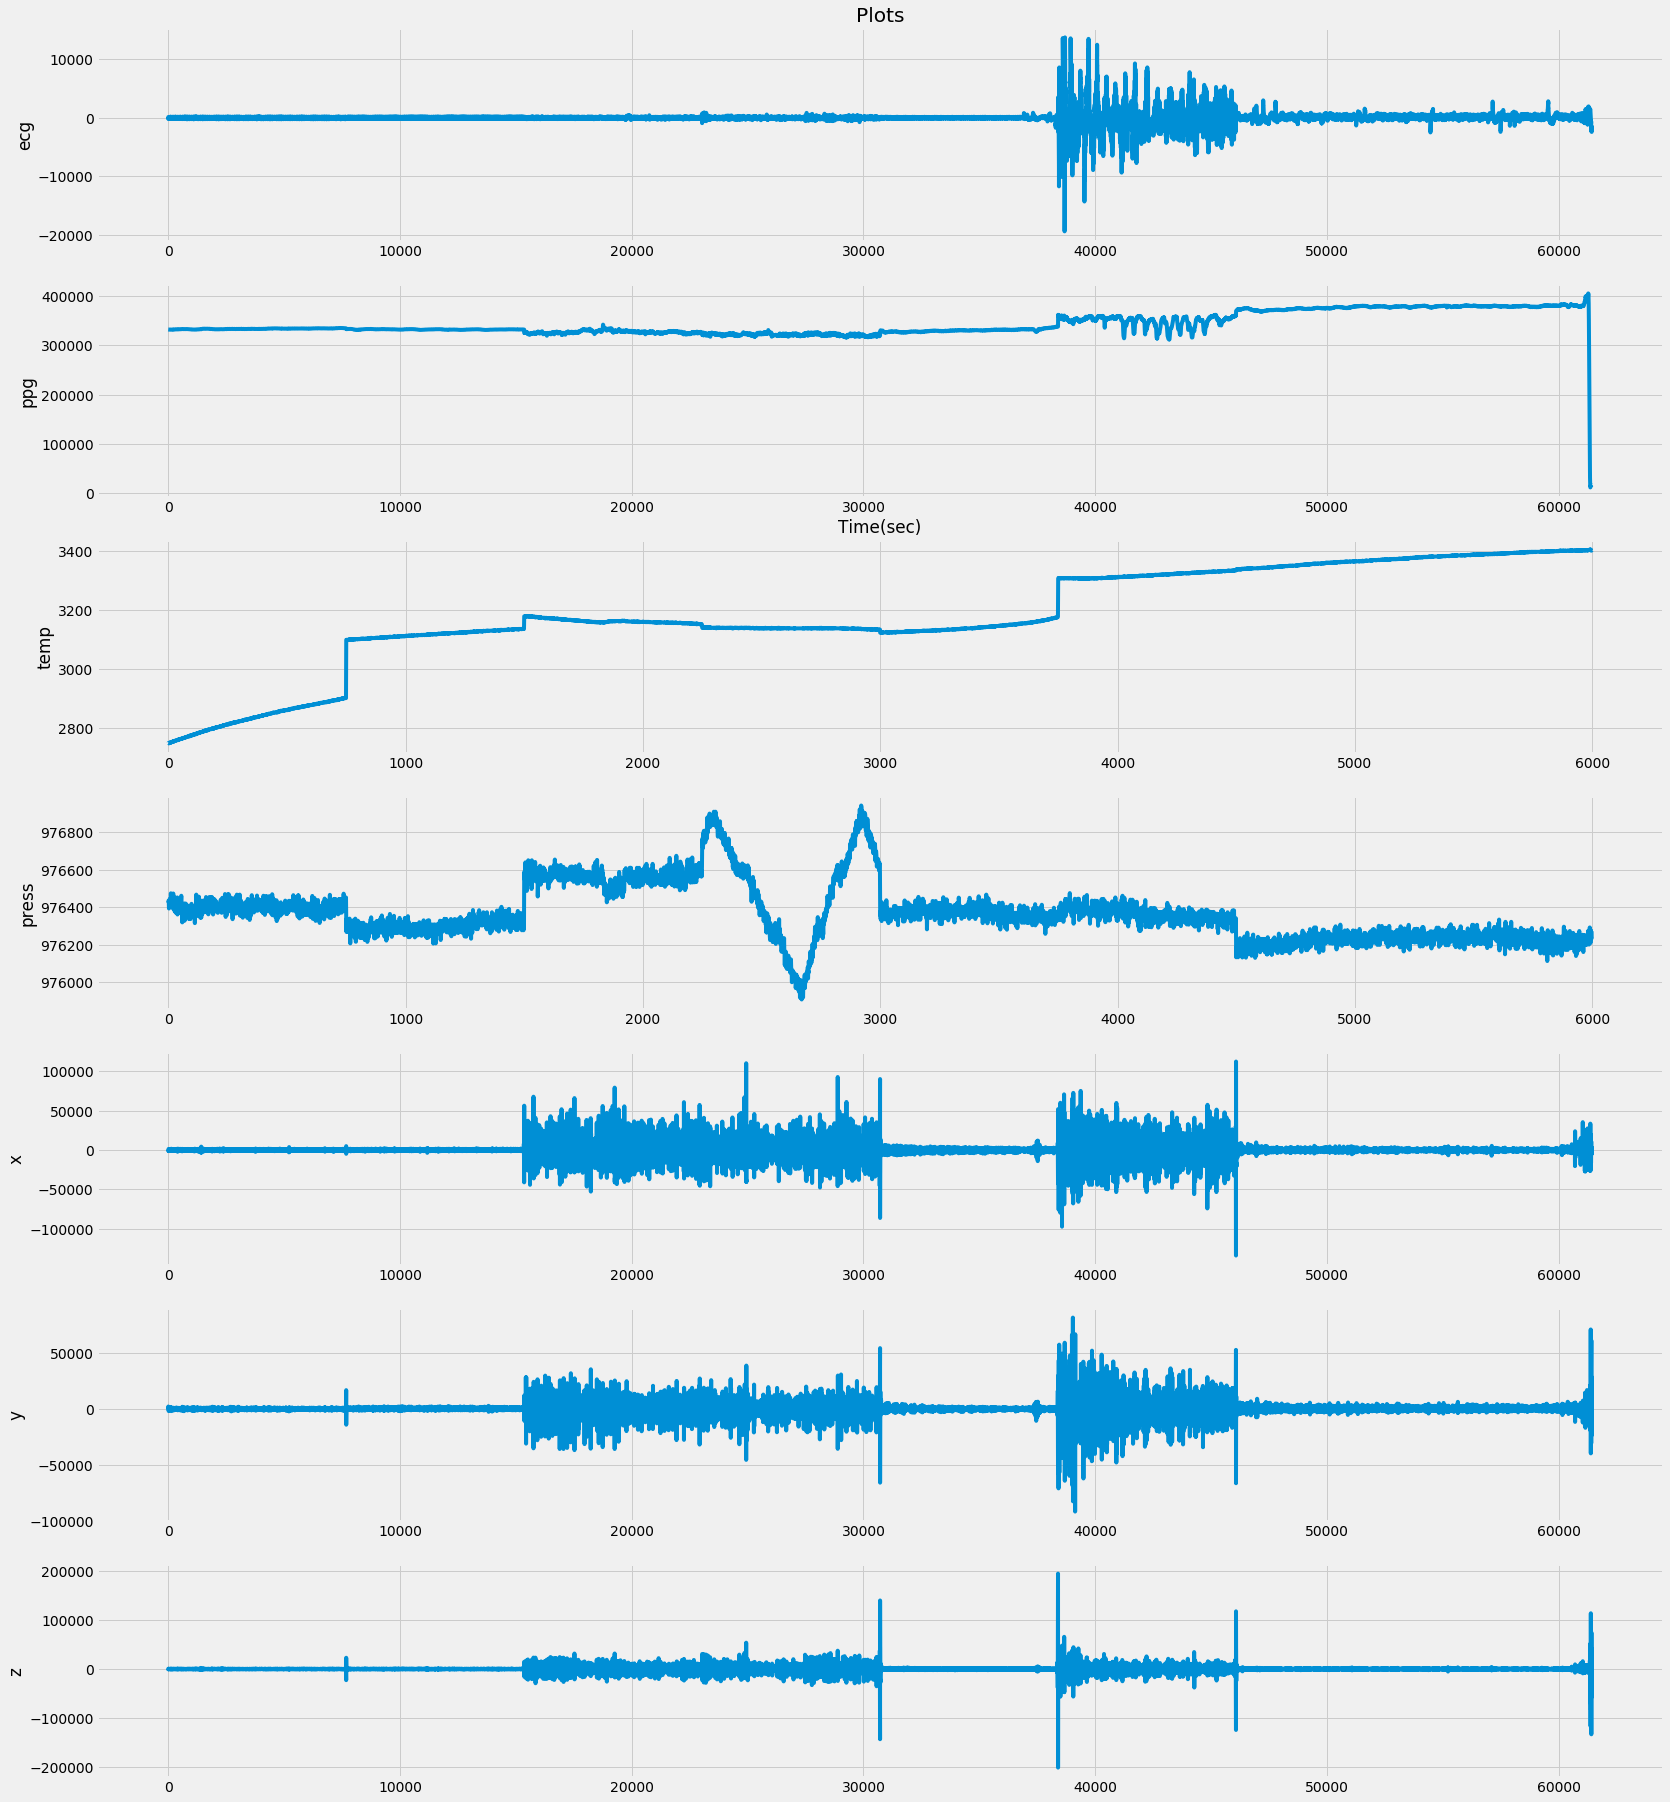

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

total_samples = 61440

def butter_bandpass(lowcut, highcut, fs):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(5, [low,high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs):
    b, a = butter_bandpass(lowcut, highcut, fs)
    y = signal.filtfilt(b, a, data)
    return y

def print_peaks(peaks):
    intervals  = 32
    for i in range(intervals):
        lo = i*1920 #1920 samples in 15 seconds
        hi = lo + 1920
        hi2 = lo + 4*1920
        result = peaks[(peaks>=lo)*(peaks<hi)]
        hr = len(result)*4

        if hi2 > total_samples:
            hrv = -1
        else:
            result = peaks[(peaks>=lo)*(peaks<hi2)]
            result = result[1:]-result[:-1]
            hrv = np.std(result)

        print("{0},{1},{2}".format(i*15,hr,hrv))
    print("")

data = np.genfromtxt('data-ecg.csv', delimiter=',')
filtered_data = butter_bandpass_filter(data,.5,35,128)
peaks1, _ = signal.find_peaks(filtered_data,distance=35,height=100)
print_peaks(peaks1)
    
data = np.genfromtxt('data-ppg.csv', delimiter=',')
filtered_data = butter_bandpass_filter(data,.5,5,128)
peaks2, _ = signal.find_peaks(filtered_data, distance=35, height=100)
print_peaks(peaks2)

#task3
intervals  = 8
low_hr = 72
high_hr = 140
for i in range(intervals):
    lo = i*7680
    hi = lo + 7680
    result = peaks1[(peaks1>=lo)*(peaks1<hi)]
    hr = len(result)
    activity_level = min(((hr-low_hr)/(high_hr-low_hr))*9 + 1,10)
    print("{0},{1}".format(i*60,math.ceil(activity_level)))
print("")

plt.style.use('fivethirtyeight')
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=7,ncols=1,figsize=[25,30])
#fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=[20,10])
ax1.set_title('Plots')
ax2.set_xlabel('Time(sec)')
ax1.set_ylabel('ecg')
ax2.set_ylabel('ppg')
ax3.set_ylabel('temp')
ax4.set_ylabel('press')
ax5.set_ylabel('x')
ax6.set_ylabel('y')
ax7.set_ylabel('z')


ax1.plot(np.genfromtxt('data-ecg.csv', delimiter=','))
ax2.plot(np.genfromtxt('data-ppg.csv', delimiter=','))
ax3.plot(np.genfromtxt('data-temperature.csv', delimiter=','))
ax4.plot(np.genfromtxt('data-barometer.csv'))
ax5.plot(butter_bandpass_filter(np.genfromtxt('data-accel_x.csv'),5,60,128))
ax6.plot(butter_bandpass_filter(np.genfromtxt('data-accel_y.csv'),5,60,128))
ax7.plot(butter_bandpass_filter(np.genfromtxt('data-accel_z.csv'),5,60,128))